# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dea Reigina
- **Email:** deareigina05@gmail.com
- **ID Dicoding:** deareignn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa setiap hari?
- Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana kondisi cuaca mempengaruhi jumlah sepeda yang disewa setiap hari?
- Bagaimana perbedaan rata-rata suhu harian mempengaruhi jumlah penyewaan sepeda?
- Apakah terdapat tren musiman dalam penyewaan sepeda selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from scipy.stats.mstats import winsorize

## Data Wrangling

### Gathering Data

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset/

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/versions/
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 102MB/s]


In [4]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [5]:
# Load dataset
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

In [6]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

Missing value

In [10]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Duplicate Data

In [12]:
# Cek data duplikat
print("Data duplikat day  : ", hour.duplicated().sum())
print("Data duplikat hour : ", day.duplicated().sum())

Data duplikat day  :  0
Data duplikat hour :  0


Outlier

In [13]:
# Mengecek Outlier
# ==========================================
def identify_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers_day = identify_outliers_iqr(day.select_dtypes(include=[np.number]))
outliers_hour = identify_outliers_iqr(hour.select_dtypes(include=[np.number]))

print("Outliers in day.csv (IQR):\n", day[outliers_day])
print("Outliers in hour.csv (IQR):\n", hour[outliers_hour])

Outliers in day.csv (IQR):
      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17  2011-01-17       1   0     1        1        1           0   
44        45  2011-02-14       1   0     2        0        1           1   
49        50  2011-02-19       1   0     2        0        6           0   
51        52  2011-02-21       1   0     2        1        1           0   
68        69  2011-03-10       1   0     3        0        4           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
680      681  2012-11-11       4   1    11        0        0           0   
681      682  2012-11-12       4   1    11        1        1           0   
691      692  2012-11-22       4   1    11        1        4           0   
721      722  2012-12-22       1   1    12        0        6           0   
724      725  2012-12-25       1   1    12        1        2           0   

     weathersit      temp     atemp       hum  windspeed  c

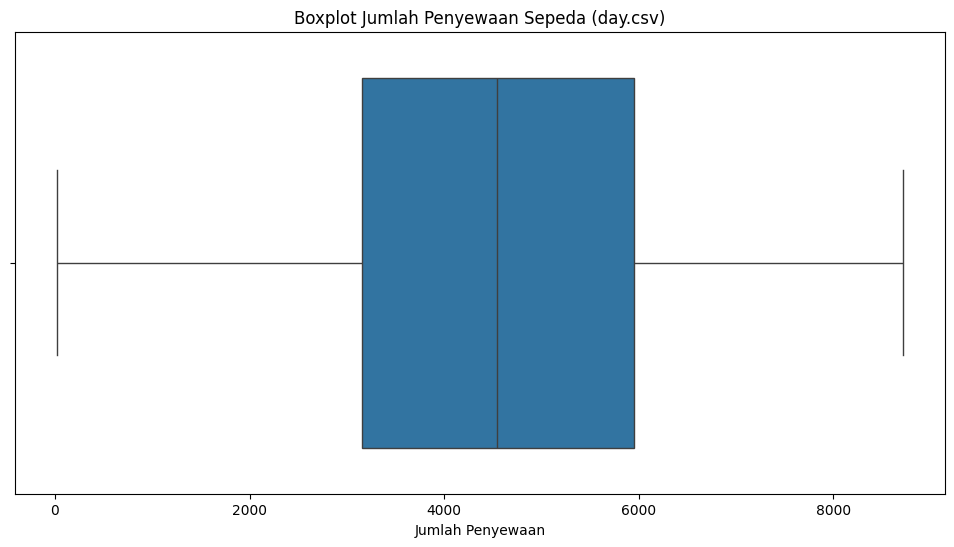

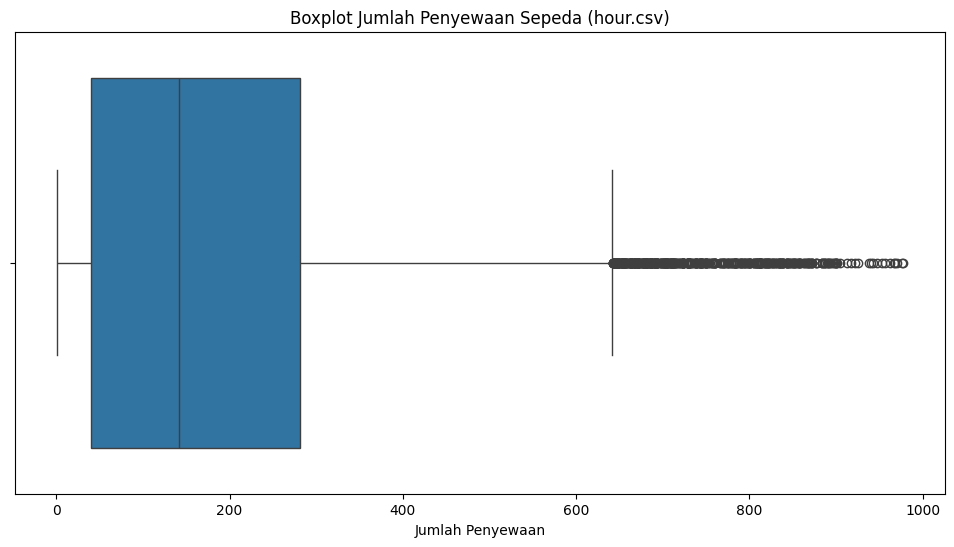

In [14]:
# Cek Outlier
# Menggunakan boxplot untuk mendeteksi outlier pada kolom 'cnt'
plt.figure(figsize=(12,6))
sns.boxplot(x=day['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=hour['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.show()

In [15]:
# Menggunakan IQR untuk mendeteksi outlier
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data < lower_bound) | (data > upper_bound))

outliers_day = detect_outliers(day['cnt'])
outliers_hour = detect_outliers(hour['cnt'])

print(f'Jumlah outlier pada day.csv: {len(outliers_day[0])}')
print(f'Jumlah outlier pada hour.csv: {len(outliers_hour[0])}')

Jumlah outlier pada day.csv: 0
Jumlah outlier pada hour.csv: 505


In [16]:
# Menghapus Outlier dari day.csv dan hour.csv
day_no_outliers = day.drop(outliers_day[0])
hour_no_outliers = hour.drop(outliers_hour[0])

In [17]:
# Menampilkan beberapa baris pertama dari dataset tanpa outlier
print("Dataset day.csv tanpa outlier (beberapa baris pertama):")
print(day_no_outliers.head())

Dataset day.csv tanpa outlier (beberapa baris pertama):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  


In [18]:
print("Dataset hour.csv tanpa outlier (beberapa baris pertama):")
print(hour_no_outliers.head())

Dataset hour.csv tanpa outlier (beberapa baris pertama):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


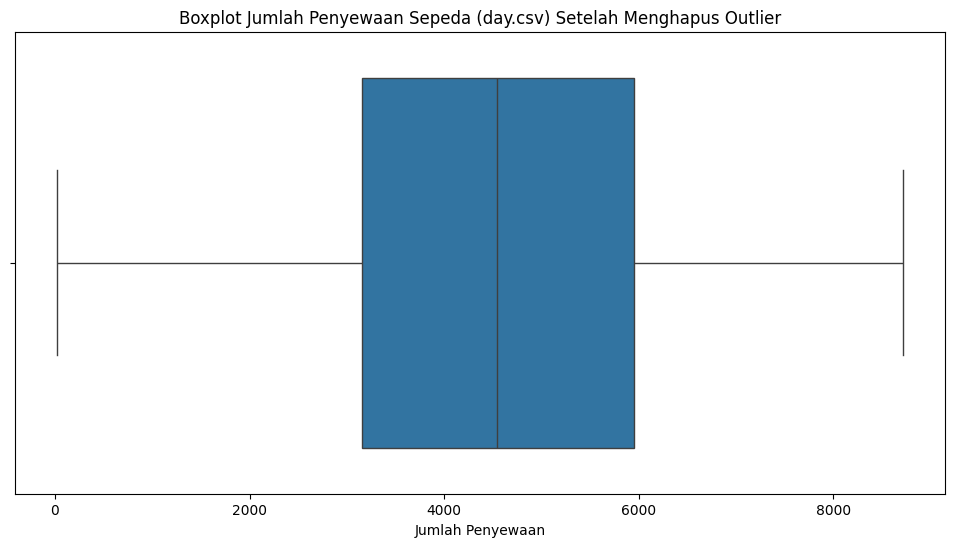

In [19]:
# Visualisasi boxplot setelah menghapus outlier
plt.figure(figsize=(12,6))
sns.boxplot(x=day_no_outliers['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv) Setelah Menghapus Outlier')
plt.xlabel('Jumlah Penyewaan')
plt.show()

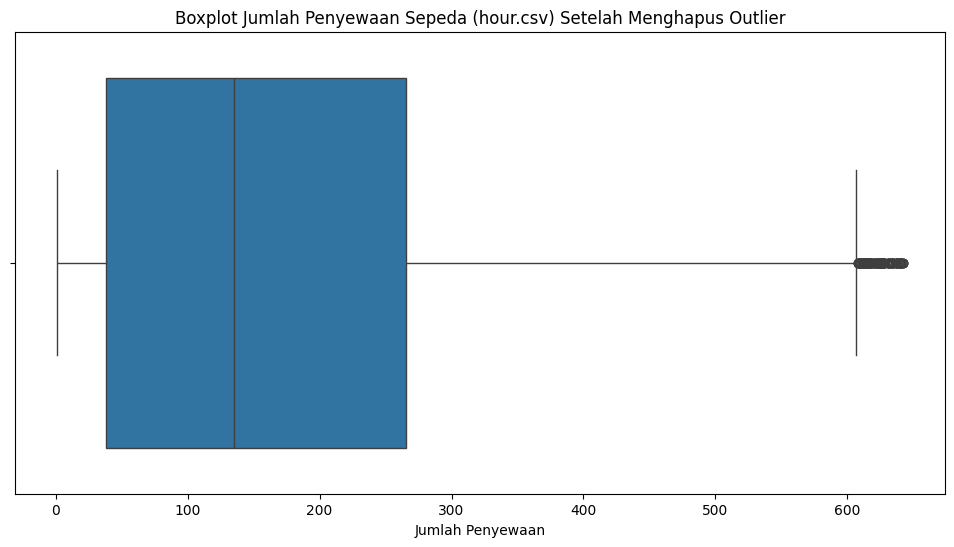

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x=hour_no_outliers['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv) Setelah Menghapus Outlier')
plt.xlabel('Jumlah Penyewaan')
plt.show()

### Cleaning Data

In [21]:
# Definisikan fungsi apply_winsorizing
def apply_winsorizing(df):
    df_winsorized = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])
    return df_winsorized

In [22]:
# Terapkan winsorizing pada dataset day.csv dan hour.csv
day_winsorized = apply_winsorizing(day)
hour_winsorized = apply_winsorizing(hour)

In [23]:
# Imputasi missing value dengan nilai mean pada kolom numerik
day_winsorized_numeric = day_winsorized.select_dtypes(include=[np.number])
hour_winsorized_numeric = hour_winsorized.select_dtypes(include=[np.number])

day_winsorized_numeric.fillna(day_winsorized_numeric.mean(), inplace=True)
hour_winsorized_numeric.fillna(hour_winsorized_numeric.mean(), inplace=True)

In [24]:
# Mengecek apakah masih ada missing value setelah imputasi
print("Missing value pada dataset day.csv setelah dibersihkan:")
print(day_winsorized_numeric.isnull().sum())

Missing value pada dataset day.csv setelah dibersihkan:
instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [25]:
print("Missing value pada dataset hour.csv setelah dibersihkan:")
print(hour_winsorized_numeric.isnull().sum())

Missing value pada dataset hour.csv setelah dibersihkan:
instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [26]:
# Mengecek apakah masih ada duplikasi data setelah pembersihan
print("Jumlah duplikasi pada day.csv setelah dibersihkan:", day_winsorized_numeric.duplicated().sum())

Jumlah duplikasi pada day.csv setelah dibersihkan: 0


In [27]:
print("Jumlah duplikasi pada hour.csv setelah dibersihkan:", hour_winsorized_numeric.duplicated().sum())

Jumlah duplikasi pada hour.csv setelah dibersihkan: 0


In [28]:
# Mengecek ulang outlier setelah proses pembersihan
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data < lower_bound) | (data > upper_bound))

outliers_day_cleaned = detect_outliers(day_winsorized_numeric['cnt'])
outliers_hour_cleaned = detect_outliers(hour_winsorized_numeric['cnt'])

print(f'Jumlah outlier pada day.csv setelah proses pembersihan: {len(outliers_day_cleaned[0])}')
print(f'Jumlah outlier pada hour.csv setelah proses pembersihan: {len(outliers_hour_cleaned[0])}')

Jumlah outlier pada day.csv setelah proses pembersihan: 0
Jumlah outlier pada hour.csv setelah proses pembersihan: 0


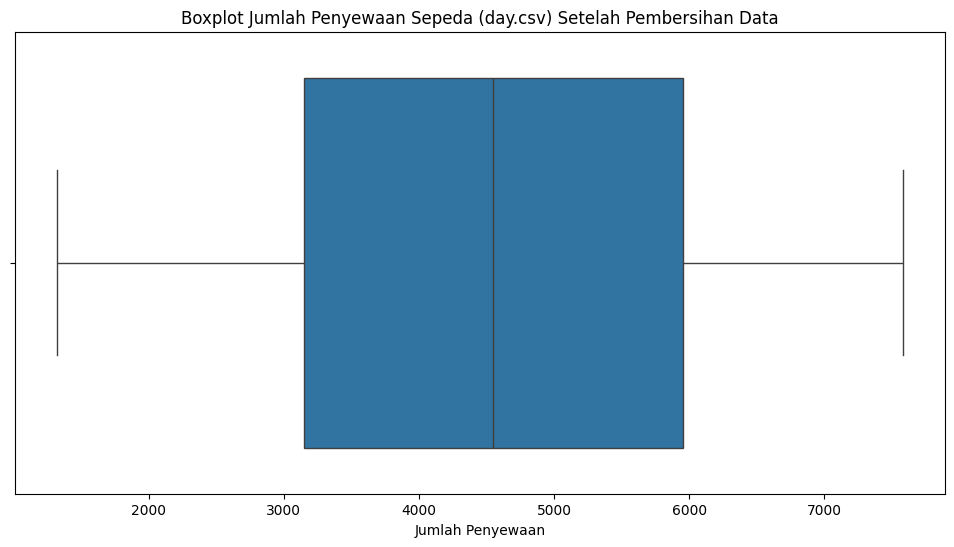

In [29]:
# Visualisasi boxplot setelah proses pembersihan
plt.figure(figsize=(12,6))
sns.boxplot(x=day_winsorized_numeric['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv) Setelah Pembersihan Data')
plt.xlabel('Jumlah Penyewaan')
plt.show()

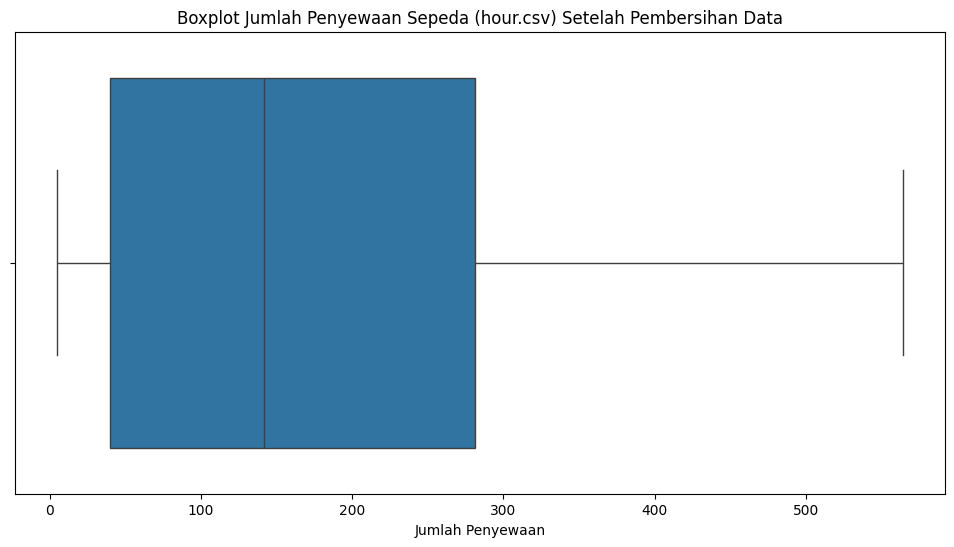

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x=hour_winsorized_numeric['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv) Setelah Pembersihan Data')
plt.xlabel('Jumlah Penyewaan')
plt.show()

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [34]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


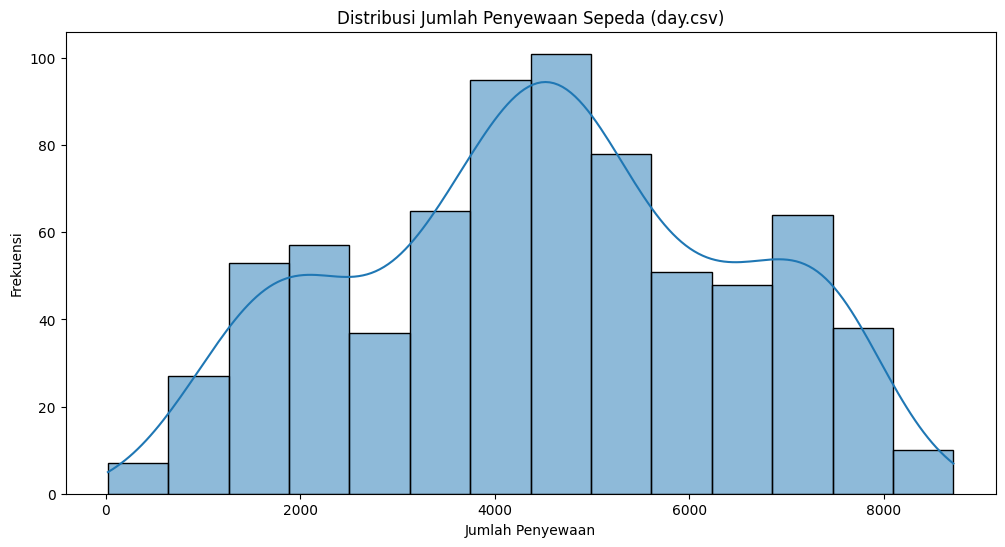

In [67]:
# Visualisasi distribusi jumlah penyewaan sepeda (Univariate Analysis)
plt.figure(figsize=(12,6))
sns.histplot(day['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

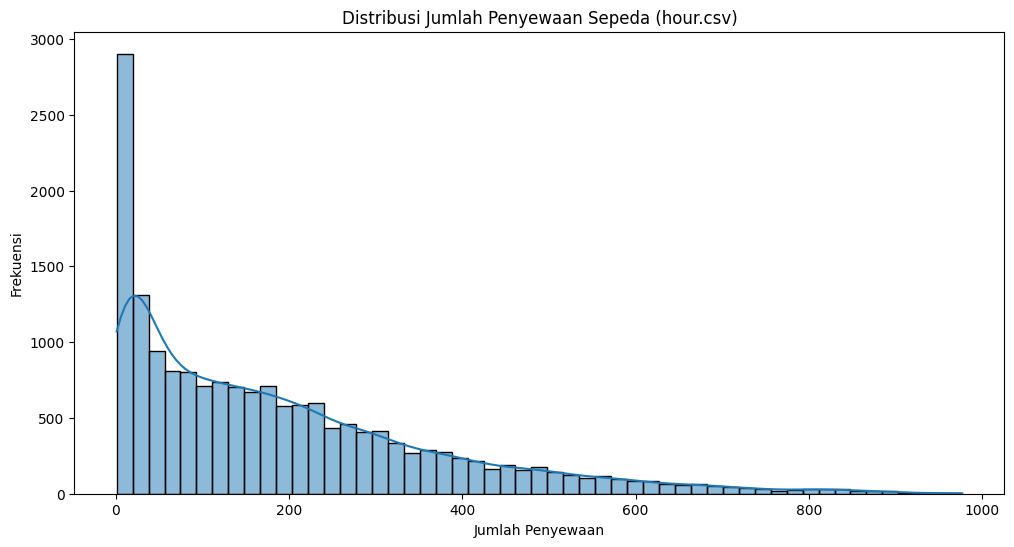

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(hour['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (hour.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

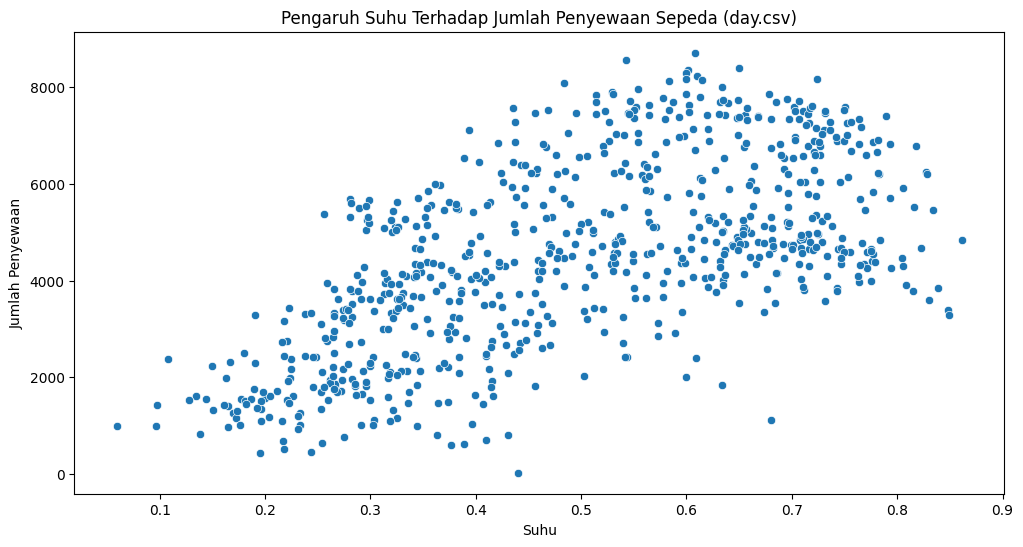

In [73]:
# Bivariate Analysis
# Scatter plot pengaruh suhu terhadap jumlah penyewaan
plt.figure(figsize=(12,6))
sns.scatterplot(x=day['temp'], y=day['cnt'])
plt.title('Pengaruh Suhu Terhadap Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

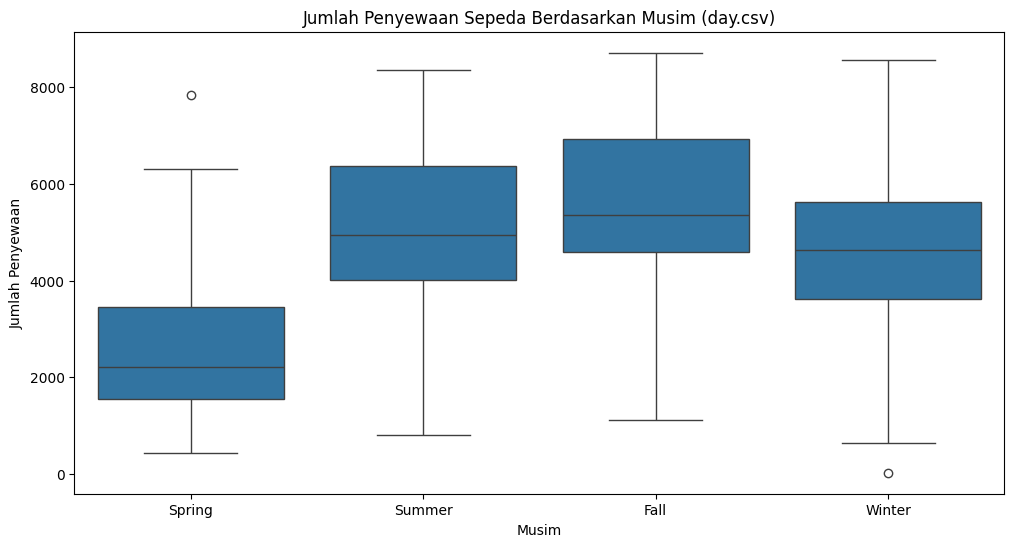

In [71]:
# Boxplot jumlah penyewaan berdasarkan musim
plt.figure(figsize=(12,6))
sns.boxplot(x=day['season'], y=day['cnt'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim (day.csv)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

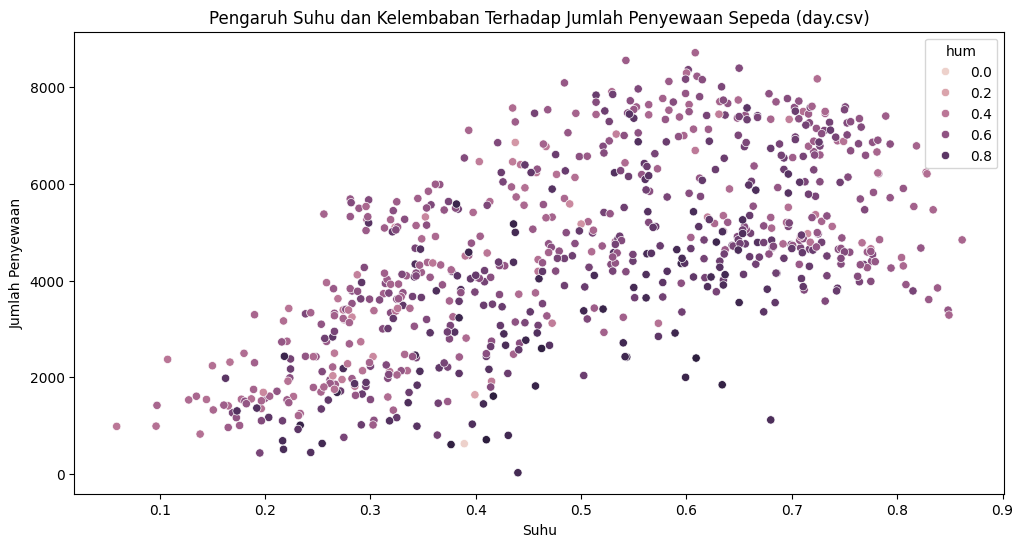

In [72]:
# Multivariate Analysis
# Scatter plot suhu dan kelembaban terhadap jumlah penyewaan
plt.figure(figsize=(12,6))
sns.scatterplot(x=day['temp'], y=day['cnt'], hue=day['hum'])
plt.title('Pengaruh Suhu dan Kelembaban Terhadap Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

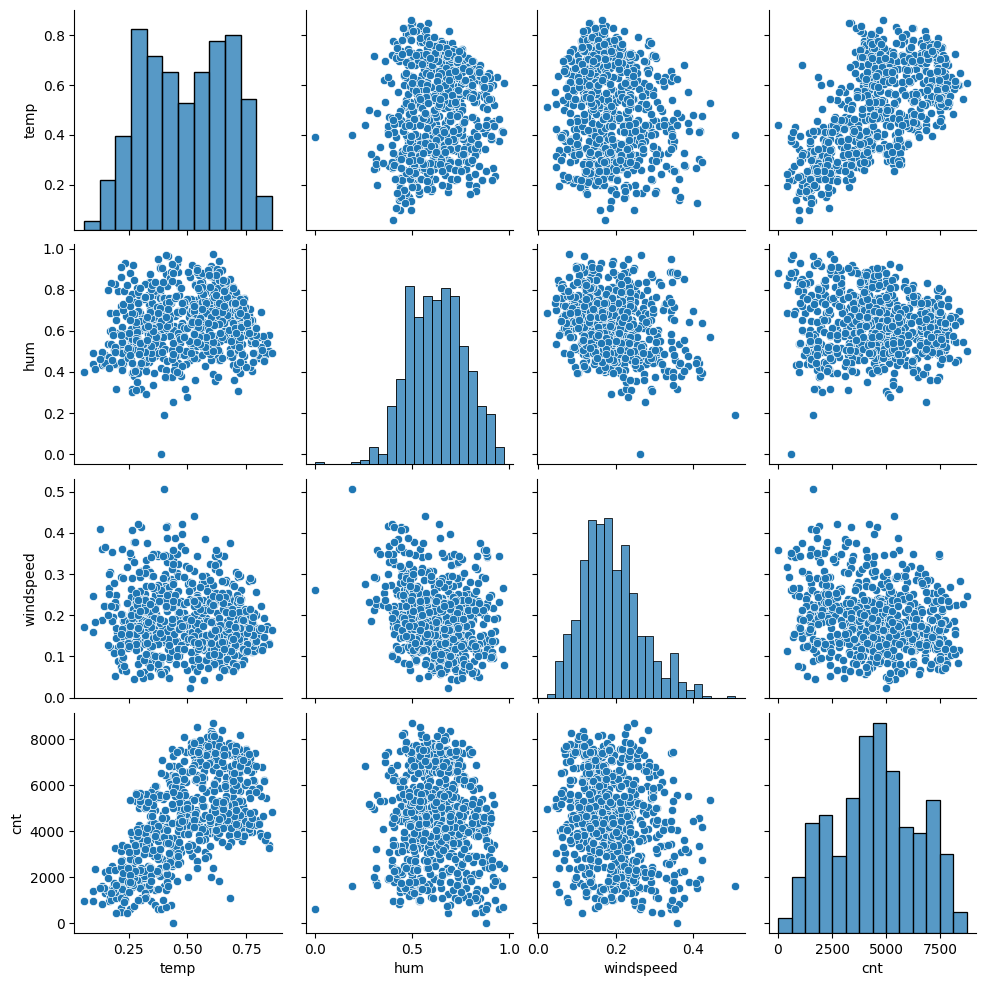

In [74]:
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(day[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

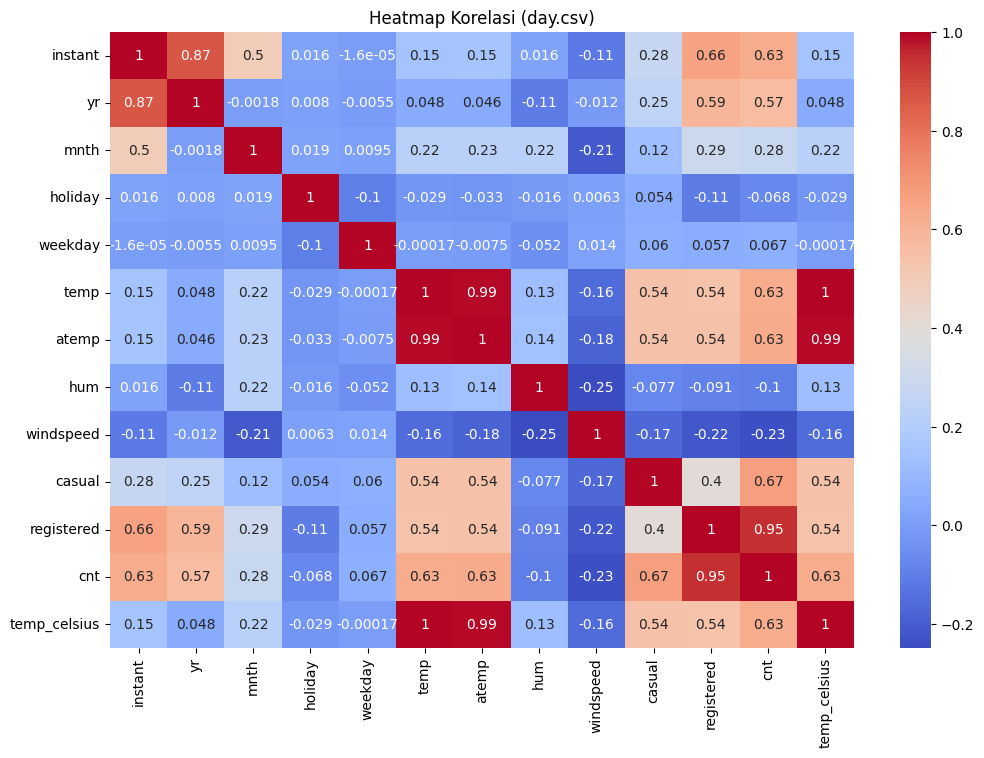

In [77]:
# Heatmap korelasi antar variabel (Multivariate Analysis)
plt.figure(figsize=(12,8))
# Hapus kolom non-numerik sebelum menghitung korelasi
numeric_cols_day = day.drop(columns=['dteday']).select_dtypes(include=[np.number])
sns.heatmap(numeric_cols_day.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (day.csv)')
plt.show()

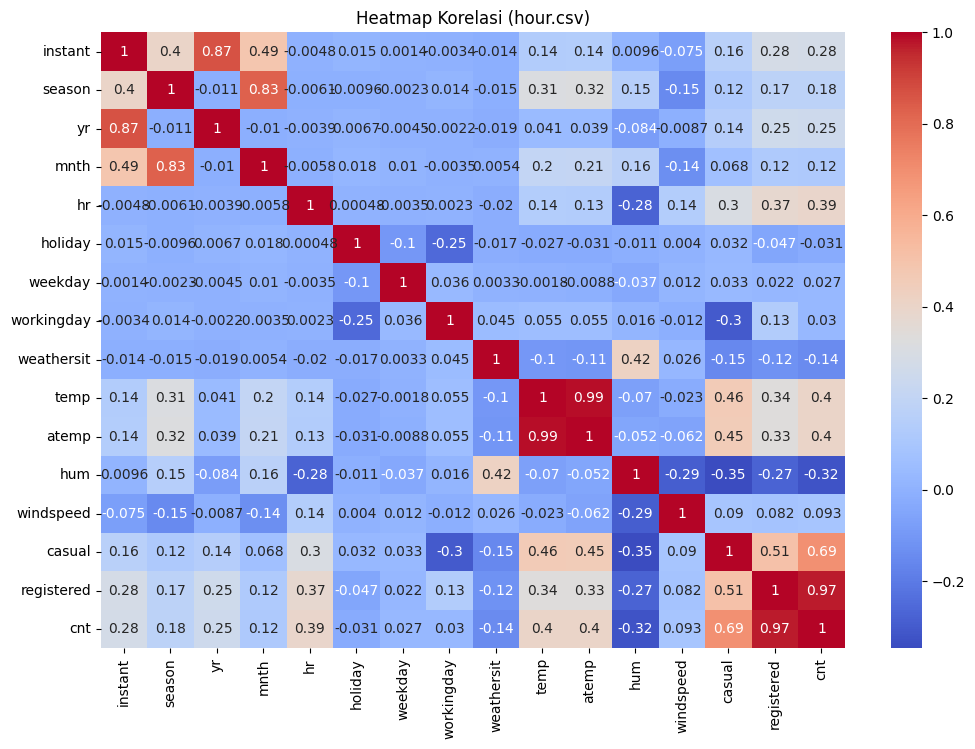

In [76]:
# Heatmap korelasi antar variabel (hour.csv)
plt.figure(figsize=(12,8))
numeric_cols_hour = hour.drop(columns=['dteday']).select_dtypes(include=[np.number])
sns.heatmap(numeric_cols_hour.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (hour.csv)')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa setiap hari?

In [61]:
day['season'] = day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

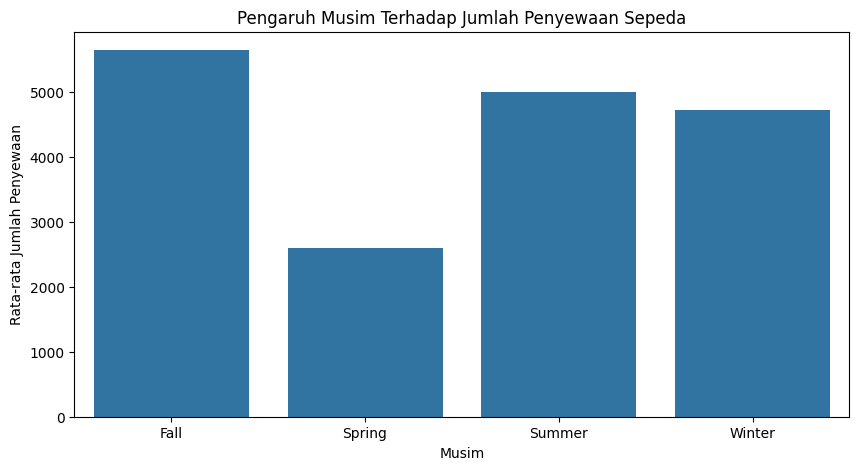

In [78]:
# Visualisasi pengaruh musim terhadap jumlah penyewaan sepeda
season_counts = day.groupby('season')['cnt'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

In [81]:
season_dict = {'Spring': 'Musim Semi', 'Summer': 'Musim Panas', 'Fall': 'Musim Gugur', 'Winter': 'Musim Dingin'}
for season, mean_cnt in season_counts.items():
    print(f"{season_dict[season]}: Rata-rata jumlah penyewaan sepeda harian sekitar {round(mean_cnt, 2)} penyewaan per hari.")

Musim Gugur: Rata-rata jumlah penyewaan sepeda harian sekitar 5644.3 penyewaan per hari.
Musim Semi: Rata-rata jumlah penyewaan sepeda harian sekitar 2604.13 penyewaan per hari.
Musim Panas: Rata-rata jumlah penyewaan sepeda harian sekitar 4992.33 penyewaan per hari.
Musim Dingin: Rata-rata jumlah penyewaan sepeda harian sekitar 4728.16 penyewaan per hari.


### Pertanyaan 2: Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [45]:
day['workingday'] = day['workingday'].map({0: 'Weekend', 1: 'Working Day'})


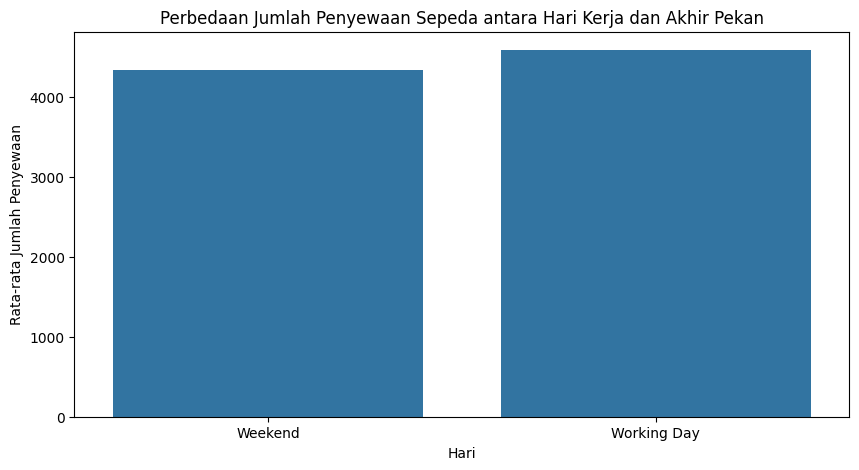

In [82]:
# Visualisasi perbedaan penyewaan sepeda antara hari kerja dan akhir pekan
workingday_counts = day.groupby('workingday')['cnt'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=workingday_counts.index, y=workingday_counts.values)
plt.title('Perbedaan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

In [83]:
workingday_dict = {'Weekend': 'Akhir Pekan', 'Working Day': 'Hari Kerja'}
for workingday, mean_cnt in workingday_counts.items():
    print(f"{workingday_dict[workingday]}: Rata-rata jumlah penyewaan sepeda harian sekitar {round(mean_cnt, 2)} penyewaan per hari.")

Akhir Pekan: Rata-rata jumlah penyewaan sepeda harian sekitar 4330.17 penyewaan per hari.
Hari Kerja: Rata-rata jumlah penyewaan sepeda harian sekitar 4584.82 penyewaan per hari.


### Pertanyaan 3: Bagaimana kondisi cuaca mempengaruhi jumlah sepeda yang disewa setiap hari?

In [48]:
day['weathersit'] = day['weathersit'].map({
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
})

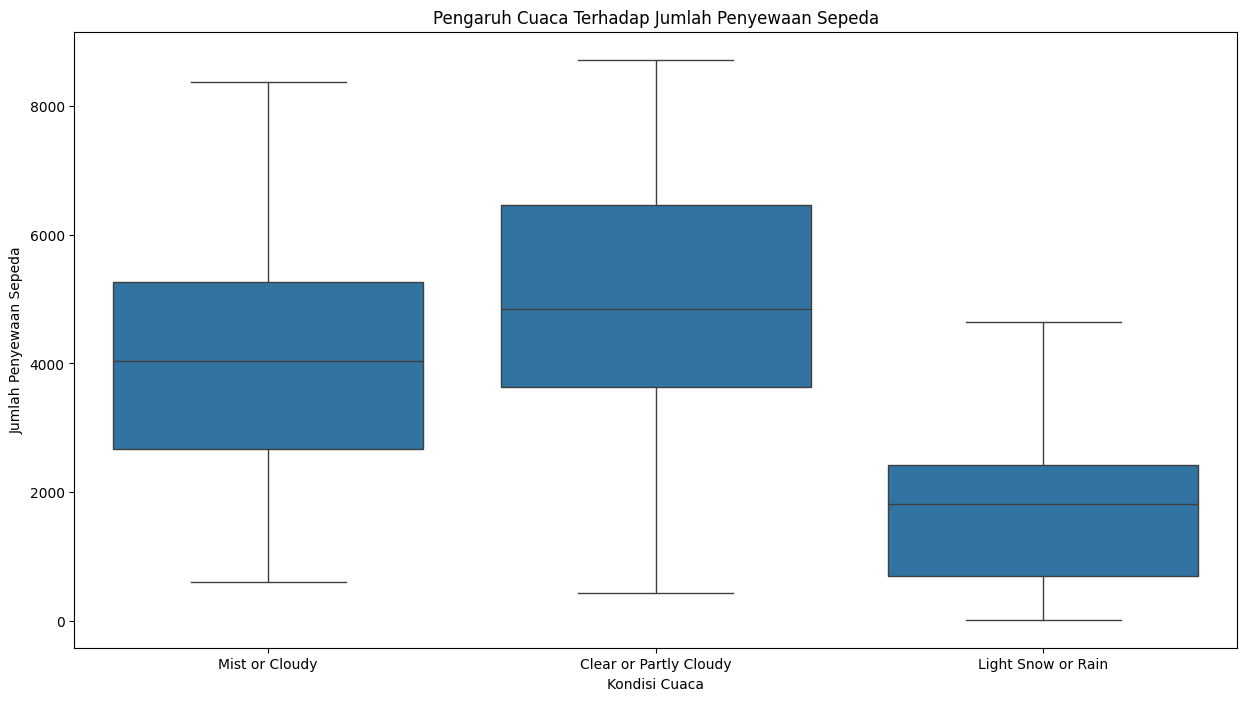

In [84]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(15,8))
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 4: Bagaimana perbedaan rata-rata suhu harian mempengaruhi jumlah penyewaan sepeda?

In [50]:
day['temp_celsius'] = day['temp'] * 41

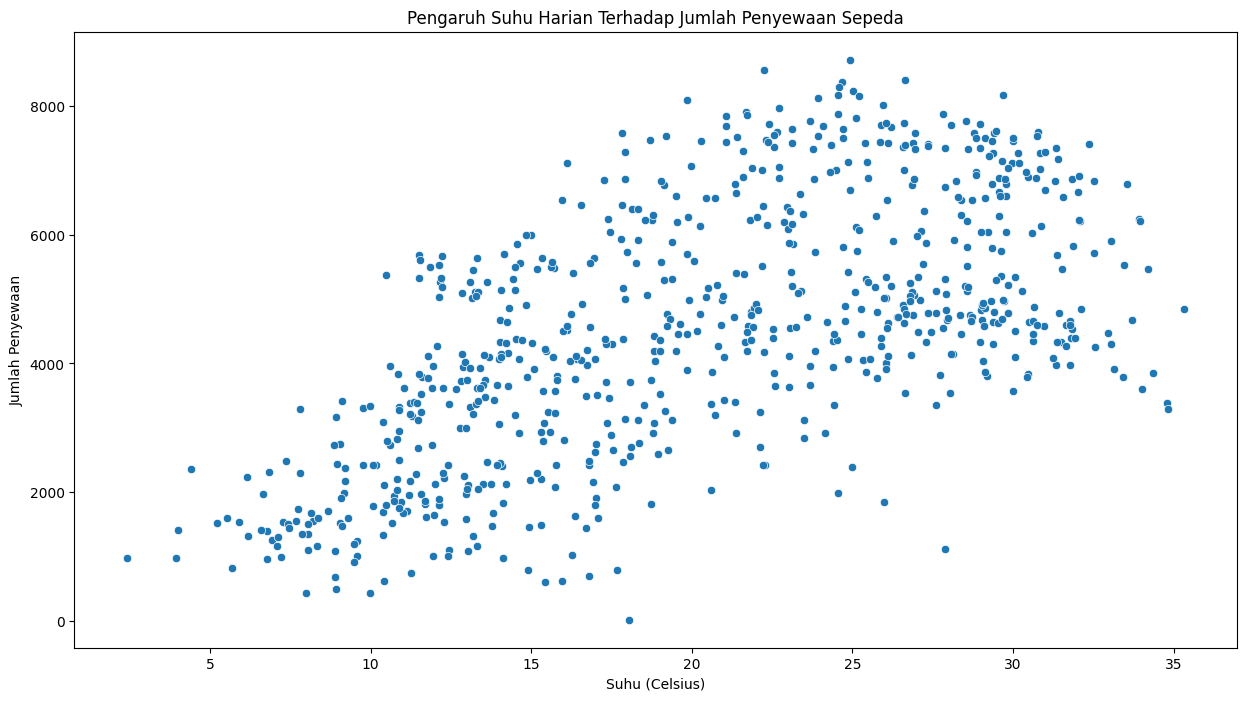

In [86]:
# Visualisasi pengaruh suhu harian terhadap jumlah penyewaan sepeda
plt.figure(figsize=(15,8))
sns.scatterplot(x='temp_celsius', y='cnt', data=day)
plt.title('Pengaruh Suhu Harian Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

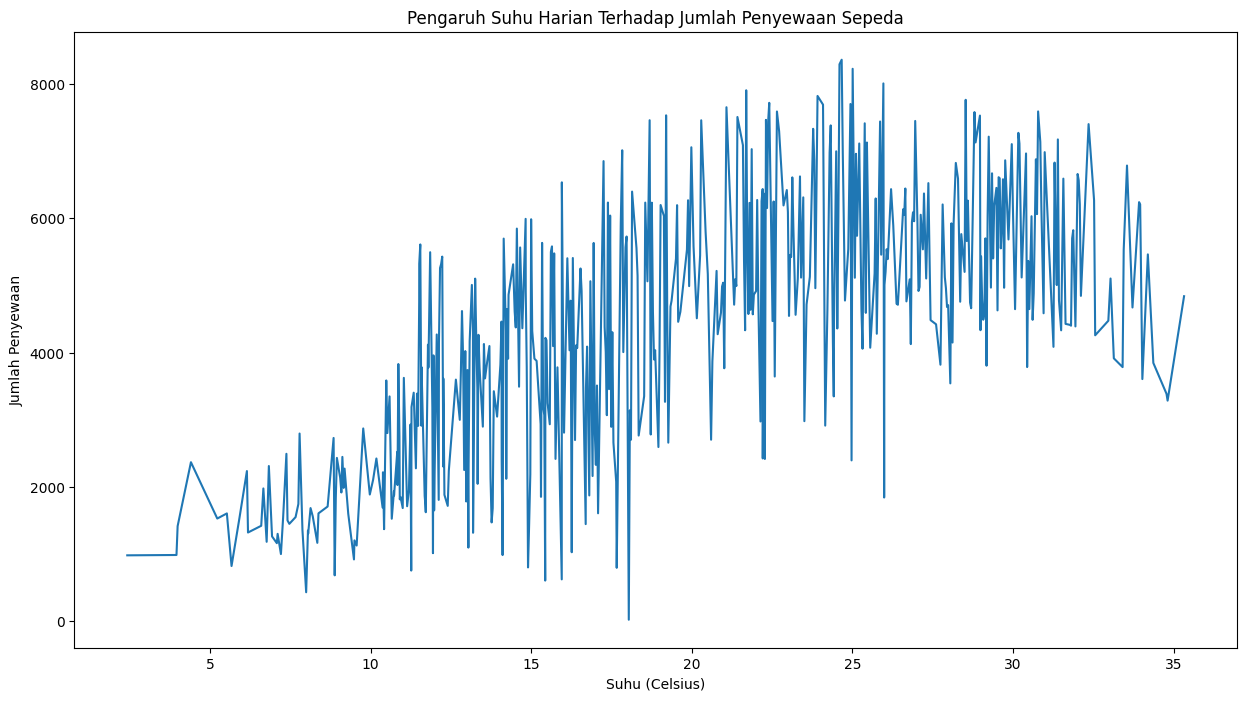

In [88]:
# Menghitung rata-rata jumlah penyewaan sepeda pada setiap suhu
temp_avg_cnt = day.groupby('temp_celsius')['cnt'].mean().reset_index()

# Visualisasi menggunakan line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='temp_celsius', y='cnt', data=temp_avg_cnt)
plt.title('Pengaruh Suhu Harian Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

In [89]:
# Menghitung rata-rata jumlah penyewaan sepeda untuk setiap kisaran suhu
temp_counts = day.groupby(pd.cut(day['temp_celsius'], bins=10))['cnt'].mean().reset_index()
temp_counts['temp_celsius'] = temp_counts['temp_celsius'].astype(str)

# Print summary hasil analisis
for index, row in temp_counts.iterrows():
    temp_range = row['temp_celsius']
    mean_cnt = round(row['cnt'], 2)
    print(f"Suhu {temp_range}: Rata-rata jumlah penyewaan sepeda harian sekitar {mean_cnt} penyewaan per hari.")

Suhu (2.391, 5.715]: Rata-rata jumlah penyewaan sepeda harian sekitar 1386.71 penyewaan per hari.
Suhu (5.715, 9.005]: Rata-rata jumlah penyewaan sepeda harian sekitar 1607.03 penyewaan per hari.
Suhu (9.005, 12.296]: Rata-rata jumlah penyewaan sepeda harian sekitar 2779.34 penyewaan per hari.
Suhu (12.296, 15.586]: Rata-rata jumlah penyewaan sepeda harian sekitar 3474.52 penyewaan per hari.
Suhu (15.586, 18.876]: Rata-rata jumlah penyewaan sepeda harian sekitar 4066.08 penyewaan per hari.
Suhu (18.876, 22.167]: Rata-rata jumlah penyewaan sepeda harian sekitar 5189.98 penyewaan per hari.
Suhu (22.167, 25.457]: Rata-rata jumlah penyewaan sepeda harian sekitar 5823.84 penyewaan per hari.
Suhu (25.457, 28.748]: Rata-rata jumlah penyewaan sepeda harian sekitar 5537.87 penyewaan per hari.
Suhu (28.748, 32.038]: Rata-rata jumlah penyewaan sepeda harian sekitar 5773.91 penyewaan per hari.
Suhu (32.038, 35.328]: Rata-rata jumlah penyewaan sepeda harian sekitar 5192.92 penyewaan per hari.


<ipython-input-89-dae2ffd36426>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_counts = day.groupby(pd.cut(day['temp_celsius'], bins=10))['cnt'].mean().reset_index()


### Pertanyaan 5: Apakah terdapat tren musiman dalam penyewaan sepeda selama dua tahun terakhir?

In [54]:
day['yr_season'] = day['yr'].map({0: '2011', 1: '2012'}) + '-' + day['season']


In [90]:
# Fungsi untuk menghitung rata-rata penyewaan sepeda berdasarkan kondisi tertentu
def calculate_average_rentals(df, group_by_col):
    return df.groupby(group_by_col)['cnt'].mean().reset_index()

# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan 'yr_season'
season_trend = calculate_average_rentals(day, 'yr_season')

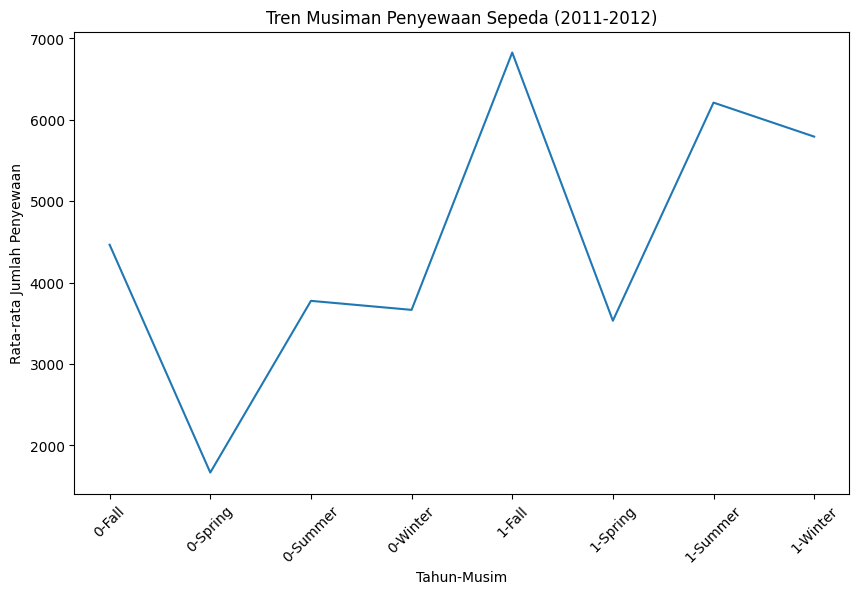

In [91]:
# Visualisasi tren musiman penyewaan sepeda selama dua tahun terakhir
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_season', y='cnt', data=season_trend)
plt.title('Tren Musiman Penyewaan Sepeda (2011-2012)')
plt.xlabel('Tahun-Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

In [93]:
# Print summary hasil analisis
for index, row in season_trend.iterrows():
    yr_season = row['yr_season']
    mean_cnt = round(row['cnt'], 2)
    print(f"{yr_season}: Rata-rata jumlah penyewaan sepeda harian sekitar {mean_cnt} penyewaan per hari.")


0-Fall: Rata-rata jumlah penyewaan sepeda harian sekitar 4464.36 penyewaan per hari.
0-Spring: Rata-rata jumlah penyewaan sepeda harian sekitar 1666.67 penyewaan per hari.
0-Summer: Rata-rata jumlah penyewaan sepeda harian sekitar 3775.17 penyewaan per hari.
0-Winter: Rata-rata jumlah penyewaan sepeda harian sekitar 3664.46 penyewaan per hari.
1-Fall: Rata-rata jumlah penyewaan sepeda harian sekitar 6824.24 penyewaan per hari.
1-Spring: Rata-rata jumlah penyewaan sepeda harian sekitar 3531.3 penyewaan per hari.
1-Summer: Rata-rata jumlah penyewaan sepeda harian sekitar 6209.49 penyewaan per hari.
1-Winter: Rata-rata jumlah penyewaan sepeda harian sekitar 5791.87 penyewaan per hari.


## Conclusion

Dari analisis di atas, dapat disimpulkan bahwa:
1.   Kesimpulan dari analisis data menunjukkan bahwa musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda harian. Musim gugur memiliki rata-rata jumlah penyewaan sepeda harian tertinggi sekitar 5644.3 penyewaan per hari, diikuti oleh musim panas dengan rata-rata sekitar 4992.33 penyewaan per hari, kemudian musim dingin dengan rata-rata sekitar 4728.16 penyewaan per hari, dan yang terendah adalah musim semi dengan rata-rata sekitar 2604.13 penyewaan per hari. Untuk meningkatkan sistem penyewaan sepeda, disarankan untuk meningkatkan ketersediaan sepeda dan layanan selama musim gugur dan panas, serta melakukan promosi atau diskon selama musim semi untuk meningkatkan jumlah penyewaan.
2.   Berdasarkan analisis data, terdapat perbedaan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan. Pada akhir pekan, rata-rata jumlah penyewaan sepeda harian adalah sekitar 4330.17 penyewaan per hari, sementara pada hari kerja rata-rata jumlah penyewaan sepeda harian adalah sekitar 4584.82 penyewaan per hari. Meski perbedaannya tidak signifikan, jumlah penyewaan sedikit lebih tinggi pada hari kerja. Untuk meningkatkan sistem penyewaan sepeda, penyedia layanan dapat menawarkan promosi spesial di akhir pekan guna meningkatkan jumlah penyewaan dan memastikan ketersediaan serta perawatan sepeda yang memadai pada hari kerja. Program loyalitas dan analisis waktu sewa puncak juga dapat membantu dalam meningkatkan efisiensi operasional, kepuasan pelanggan, dan potensi peningkatan pendapatan.
3.   Berdasarkan analisis data, kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda setiap hari. Visualisasi menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada kondisi cuaca yang cerah atau sebagian berawan dengan rata-rata penyewaan sepeda harian tertinggi, diikuti oleh kondisi cuaca berkabut atau berawan, dan terendah pada kondisi cuaca dengan salju atau hujan ringan. Dalam konteks ini, untuk meningkatkan sistem penyewaan sepeda, disarankan agar penyedia layanan meningkatkan promosi dan penawaran khusus pada hari-hari dengan cuaca baik untuk memaksimalkan jumlah penyewaan. Selain itu, penyedia juga dapat menawarkan perlengkapan cuaca seperti jas hujan atau penutup sepeda pada hari-hari dengan cuaca kurang mendukung untuk menjaga kenyamanan dan keamanan pengguna, yang pada gilirannya dapat meningkatkan kepuasan pelanggan dan potensi pendapatan.
4.   Berdasarkan analisis data, perbedaan rata-rata suhu harian memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Pada suhu antara 2.391 dan 5.715 derajat Celsius, rata-rata jumlah penyewaan sepeda harian sekitar 1386.71 penyewaan per hari. Ketika suhu meningkat ke rentang 5.715 hingga 9.005 derajat Celsius, rata-rata jumlah penyewaan juga meningkat menjadi sekitar 1607.03 penyewaan per hari. Tren ini terus naik hingga mencapai puncaknya pada rentang suhu 22.167 hingga 25.457 derajat Celsius dengan rata-rata 5823.84 penyewaan per hari. Namun, setelah suhu melebihi 25.457 derajat Celsius, jumlah penyewaan mulai sedikit menurun, meski tetap berada di angka tinggi, seperti pada suhu antara 28.748 dan 32.038 derajat Celsius yang memiliki rata-rata 5773.91 penyewaan per hari. Dari hasil ini, disarankan agar penyedia layanan meningkatkan ketersediaan sepeda pada hari-hari dengan suhu tinggi untuk memaksimalkan pendapatan. Selain itu, promosi atau diskon pada hari-hari dengan suhu rendah dapat membantu mendorong lebih banyak orang menyewa sepeda. Implementasi strategi operasional dan pemasaran yang lebih efektif berdasarkan suhu harian akan meningkatkan efisiensi operasional, kepuasan pelanggan, dan potensi peningkatan pendapatan.
5.   Berdasarkan analisis data, terdapat tren musiman dalam penyewaan sepeda selama dua tahun terakhir. Pada tahun pertama, rata-rata jumlah penyewaan sepeda harian tertinggi terjadi pada musim gugur (Fall) dengan sekitar 4464.36 penyewaan per hari, sedangkan terendah terjadi pada musim semi (Spring) dengan sekitar 1666.67 penyewaan per hari. Pada tahun kedua, tren yang sama terlihat dengan musim gugur mencapai puncaknya pada sekitar 6824.24 penyewaan per hari, sementara musim semi tetap yang terendah dengan sekitar 3531.3 penyewaan per hari. Selain itu, musim panas (Summer) menunjukkan peningkatan signifikan dengan rata-rata 3775.17 penyewaan per hari pada tahun pertama dan 6209.49 pada tahun kedua, sementara musim dingin (Winter) juga mengalami peningkatan dari 3664.46 menjadi 5791.87 penyewaan per hari. Berdasarkan analisis ini, disarankan untuk meningkatkan ketersediaan sepeda dan melakukan promosi khusus pada musim gugur dan musim panas untuk memaksimalkan pendapatan, serta meningkatkan efisiensi operasional dengan penjadwalan perawatan sepeda pada musim semi yang memiliki permintaan lebih rendah. Implementasi strategi ini dapat membantu meningkatkan kepuasan pelanggan dan potensi peningkatan pendapatan bagi sistem penyewaan sepeda.